In [125]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals



%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
# These steps are typically always called.  The "matplotlib inline" is to display figures in this notebook itself 

from matplotlib import pylab as pl

import pandas as pd 
# pandas is a library for handling datasets; you will see some useful built-in functions in action

import os # to move around your operating system

import scipy as sp  # scientific computation library

from scipy.stats import multivariate_normal

from sklearn import mixture

import math as math

from mpl_toolkits.mplot3d import axes3d # in case we need to plot in 3D z=f(x,y)
import seaborn as sns  # another package for pretty graphs

# Scikit-learn (sklearn) is a powerful and fairly comprehensive library of ML algorithms

from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity

In [126]:
np.random.seed(3701)
n_a = 500
n_b = 500
ma = [1.15, 3] #mean vector
Sa = np.array([[1.0, 0.5],[0.5, 1.0]])
data_a = np.random.multivariate_normal(ma, Sa, n_a)
#label for data_a
y_a = np.zeros(n_a, dtype=int)

mb = [4.16, 2.0] #mean vector
Sb = np.array([[0.6, 0.3],[0.3, 0.7]])
data_b = np.random.multivariate_normal(mb, Sb, n_b)
#label for data_b
y_b = np.ones(n_b, dtype=int)

# concatenate data
data = np.concatenate((data_a, data_b)) 

#concatenate labels
y = np.concatenate((y_a, y_b))

#define a dict tobe converted to a dataframe
d={'X1': data[:,0],
   'X2': data[:,1],
    'Y': y}

In [127]:
df=pd.DataFrame(d)
df.head()

,X1,X2,Y
0,0.646268,0.903059,0
1,1.468806,1.417932,0
2,1.655654,3.690075,0
3,0.790246,2.966380,0
4,0.438695,2.061131,0


In [128]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,X1,X2,Y
0,1.749590,4.537306,0
1,5.379536,2.090499,1
2,4.133558,4.353184,1
3,0.205179,2.171060,0
4,0.886139,3.694103,0


Text(0.5,1,'Projection onto the optimal vector [-1.15845593 0.81115958]')

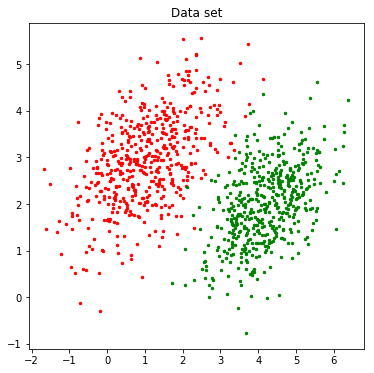

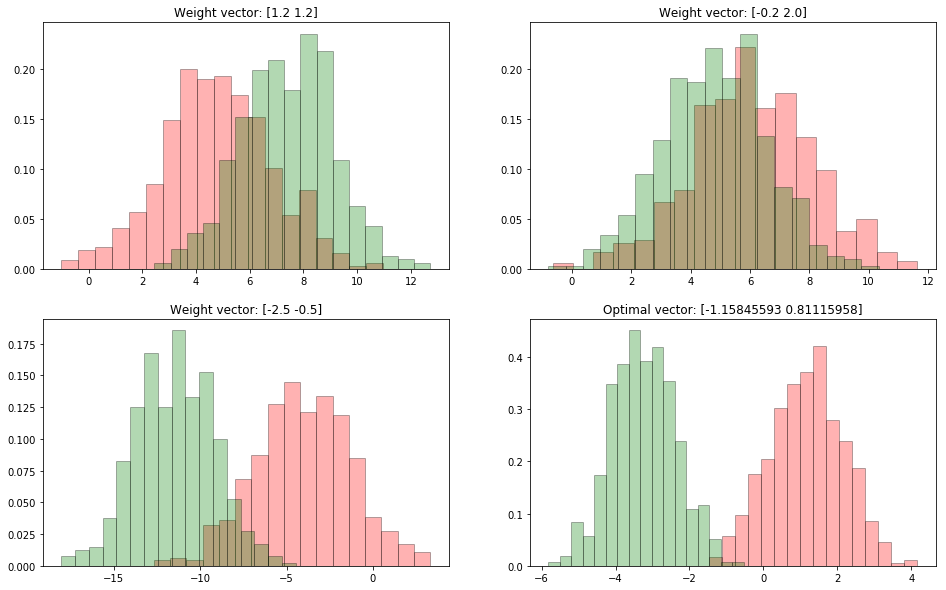

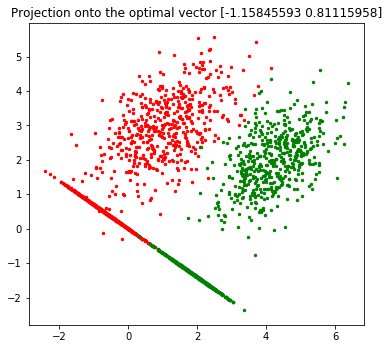

In [129]:
fig = plt.figure(figsize=(6,6))

weight1 = np.matrix('1.2 1.2')
weight2 = np.matrix('0.2 2.0')
weight3 = np.matrix('-2.5 -0.5')
weight4 = np.matrix('-1.15845593 0.81115958')

y_a1 = np.matmul(weight1, data_a.T)
y_b1 = np.matmul(weight1, data_b.T)

y_a2 = np.matmul(weight2, data_a.T)
y_b2 = np.matmul(weight2, data_b.T)

y_a3 = np.matmul(weight3, data_a.T)
y_b3 = np.matmul(weight3, data_b.T)

y_a4 = np.matmul(weight4, data_a.T)
y_b4 = np.matmul(weight4, data_b.T)

ax = fig.add_subplot(111)
ax.scatter(data_a[:,0], data_a[:,1], s=6, c='r')
ax.scatter(data_b[:,0], data_b[:,1], s=6, c='g')
# ax.quiver(0,0, weight1.item(0), weight1.item(1), scale = 1, color='k')
# ax.quiver(0,0, weight2.item(0), weight2.item(1), scale = 1, color='b')
# ax.quiver(0,0, weight3.item(0), weight3.item(1), scale = 1, color='y')
# ax.quiver(0,0, weight4.item(0), weight4.item(1), scale = 1, color='c')
ax.set_title('Data set')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), squeeze=False)
ax[0][0].hist(np.squeeze(np.asarray(y_a1)), density=True,bins='auto', color='r', alpha=0.3, ec='black')
ax[0][0].hist(np.squeeze(np.asarray(y_b1)), density=True, bins='auto', color='g', alpha=0.3, ec='black')
ax[0][0].set_title('Weight vector: [1.2 1.2]')
ax[0][1].hist(np.squeeze(np.asarray(y_a2)), density=True,bins='auto', color='r', alpha=0.3, ec='black')
ax[0][1].hist(np.squeeze(np.asarray(y_b2)), density=True, bins='auto', color='g', alpha=0.3, ec='black')
ax[0][1].set_title('Weight vector: [-0.2 2.0]')
ax[1][0].hist(np.squeeze(np.asarray(y_a3)), density=True,bins='auto', color='r', alpha=0.3, ec='black')
ax[1][0].hist(np.squeeze(np.asarray(y_b3)), density=True, bins='auto', color='g', alpha=0.3, ec='black')
ax[1][0].set_title('Weight vector: [-2.5 -0.5]')
ax[1][1].hist(np.squeeze(np.asarray(y_a4)), density=True,bins='auto', color='r', alpha=0.3, ec='black')
ax[1][1].hist(np.squeeze(np.asarray(y_b4)), density=True, bins='auto', color='g', alpha=0.3, ec='black')
ax[1][1].set_title('Optimal vector: [-1.15845593 0.81115958]')

def project_data(data, v):
    w=v/np.linalg.norm(v)
    coord_pr_data=data.dot(w)
    
    return coord_pr_data[:, None]*np.tile(w, (coord_pr_data.shape[0], 1))

        
v=np.array([-1.15845593, 0.81115958])
pr_data_a = project_data(data_a, v)
pr_data_b = project_data(data_b, v)


fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, aspect='equal')
ax.scatter(data_a[:,0], data_a[:, 1], s=6, c='r')
ax.scatter(data_b[:,0], data_b[:, 1], s=6, c='g')
ax.scatter(pr_data_a[:,0], pr_data_a[:, 1], s=6, c='r')
ax.scatter(pr_data_b[:,0], pr_data_b[:, 1], s=6, c='g')
ax.set_title('Projection onto the optimal vector [-1.15845593 0.81115958]')

In [130]:
def fisherRatio(mean_a, mean_b, std_a, std_b, data_a, data_b, data): 
    return (mean_a - mean_b)**2/((len(data_a)/len(data))*std_a + (len(data_b)/len(data))*std_b)
    
def unbalancedFisherRatio(mean_a, mean_b, std_a, std_b):
    return (mean_a - mean_b)**2/(std_a + std_b)

# Direction w
w0 = [1, 1]
fisherArray = []
unbalancedArray = []
angles = np.linspace(0.0, 360.0, num=361)
optimalw0 = [0.0, 0.0]

def rotationVectors():
    for i in range(0, 361):
        theta = np.radians(i)
        cos = np.cos(theta)
        sin = np.sin(theta)
        R = np.array(((cos, -sin), (sin, cos)))
        wTheta = np.matmul(R, w0)

        y_a = np.matmul(wTheta, data_a.T)
        y_b = np.matmul(wTheta, data_b.T)
        mean_a = np.mean(y_a)
        mean_b = np.mean(y_b)
        std_a = np.std(y_a)**2
        std_b = np.std(y_b)**2
        y_all = np.concatenate((y_a, y_b))
        fisherArray.insert(i, fisherRatio(mean_a, mean_b, std_a, std_b, y_a, y_b, y_all))
        unbalancedArray.insert(i, unbalancedFisherRatio(mean_a, mean_b, std_a, std_b))

rotationVectors()

def optimalWeightVector(fisherArray):
    theta = np.radians(np.argmax(fisherArray))
    cos = np.cos(theta)
    sin = np.sin(theta)
    R = np.array(((cos, -sin), (sin, cos)))
    
    return np.matmul(R, w0)
    
optimalw0 = optimalWeightVector(fisherArray)

print(optimalw0)
# inmultumesc x1 si x2 cu vectorul w0 (proiectia pe vector) 
# mean si variance pentru fiecare clasa
# fisher lda


[-1.15845593  0.81115958]


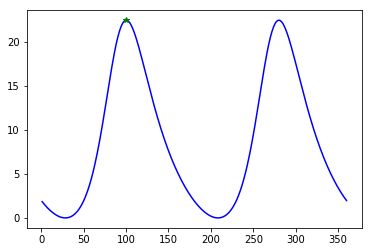

In [131]:
# plt.scatter(angles, fisherArray, s=3, c='b')
# plt.scatter(angles, unbalancedArray, s=3, c='r')

plt.plot(angles[1:], fisherArray[1:], c='b')
# plt.plot(angles[1:], unbalancedArray[1:], c='r')
plt.plot(angles[np.argmax(fisherArray)], fisherArray[np.argmax(fisherArray)], 'g*')

plt.show()

In [132]:
# Calculates the logOdds of a single class
def getlogOddsClass(covarianceMatrix, data, meanvector):
    logOddsClass = []
    
    standardData = np.subtract(data, meanvector)
    standardDataTranspose = standardData.T
    
    for i in range(len(standardData)):
        logOddsClass.insert(i, 0.5 * standardData[i,].dot(covarianceMatrix).dot(standardDataTranspose[:,i].reshape(2,1)))
        
    return logOddsClass
    
# Calculates the logOdds for 2-class classification
def getlogOdds(logOddsA, logOddsB, covarianceA, covarianceB):
    detSa = np.linalg.det(covarianceA)
    detSb = np.linalg.det(covarianceB)
    ratioSaSb = detSa/detSb
    logDetSaSb = math.log10(ratioSaSb)
    logOdds = []
    
    for i in range(len(logOddsA)):
        logOdds.insert(i, logDetSaSb + logOddsB[i] - logOddsA[i])
    
    return logOdds
    
# logOdds of class A with Sa covariance matrix
logOddsA = getlogOddsClass(Sa, data_a, ma)

# logOdds of class B with Sb covariance matrix
logOddsB = getlogOddsClass(Sb, data_b, mb)

# logOdds when the covariance matrices Sa and Sb are different
logOdds = getlogOdds(logOddsA, logOddsB, Sa, Sb)

# logOdds of class A with Sa covariance matrix
logOddsAEqual = getlogOddsClass(Sa, data_a, ma)

# logOdds of class B with Sa covariance matrix (equal covariances)
logOddsBEqual = getlogOddsClass(Sa, data_b, mb)

# logOdds when the covariance matrices Sa and Sb are the equal
logOddsEqual = getlogOdds(logOddsAEqual, logOddsBEqual, Sa, Sa)

def getVanishedLogOdds(logOdds):
    vanishedlogOdds = []
    count = 0
    for i in range(len(logOdds)):
        if(logOdds[i] > -0.2 and logOdds[i] < 0.2):
            vanishedlogOdds.insert(count, logOdds[i])
            count += 1;
            
    return vanishedlogOdds

vanishedLogOdds = getVanishedLogOdds(logOdds)
vanishedLogOddsEqual = getVanishedLogOdds(logOddsEqual)

# plt.contour(x, y, rvA.pdf(pos))
# plt.contour(x, y, rvB.pdf(pos))
# plt.scatter(xPoints, yPoints, s=1)

# xAxis = np.linspace(0.0, len(vanishedLogOdds), len(vanishedLogOdds))

# plt.plot(xAxis, vanishedLogOdds, c='k')
# plt.show()

# new_list = [i *(-1) for i in vanishedLogOdds]

# yv = 1/(1+np.exp(new_list))
# fig = plt.figure()
# fig.suptitle('Sigmoidal function')
# ax = fig.add_subplot(111)
# ax.plot(vanishedLogOdds, yv)


# # return rows
# print(xT[0,])

# # return columns
# print(xT[:,1])

C:\Users\tzica\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\tzica\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\tzica\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\tzica\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

-0.021492905451305333

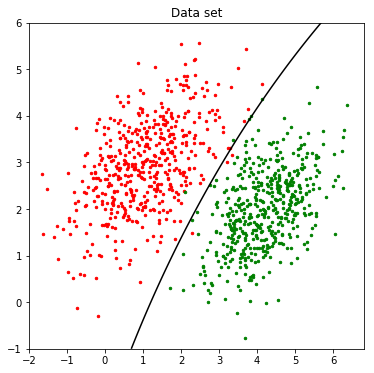

In [166]:
# clf = mixture.GMM(n_components=2, covariance_type='full')
# clf.fit(data)

# def g1(x ,y):
#     return clf.predict_proba(np.column_stack((x,y)))[:,0]

# def g2(x, y):
#     return clf.predict_proba(np.column_stack((x,y)))[:,1]


# X, Y = np.meshgrid(-15,15)
# x = X.ravel()
# y = Y.ravel()

# print(X.shape)

# p = (g1(x, y) - g2(x, y))

# print(p)

# pl.scatter(data[:,0], data[:, 1])
# pl.contour(X, Y, p, levels=[0])

fig = plt.figure(figsize=(6,6))

clf = mixture.GMM(n_components=2, covariance_type='full')
clf.fit(data)

#define g1(x, y) and g2(x, y)

def g1(x, y):
    return clf.predict_proba(np.column_stack((x, y)))[:, 0]

def g2(x, y):
    return clf.predict_proba(np.column_stack((x, y)))[:, 1]

#plot code from here

X, Y = np.mgrid[-2:6:500j, -1:6:500j]
x = X.ravel()
y = Y.ravel()

p = (g1(x, y) - g2(x, y)).reshape(X.shape)

ax = fig.add_subplot(111)
pl.scatter(data_a[:,0], data_a[:,1], s=6, c='r')
pl.scatter(data_b[:,0], data_b[:,1], s=6, c='g')
pl.contour(X, Y, p, levels=[0], colors='k')
pl.title('Data set')



estimatedCovariance = (np.cov(data_a.T) + np.cov(data_b.T))
estimatedCovarianceInverse = np.linalg.inv(estimatedCovariance)



const = np.log(1./2)/np.log(1./2)-0.5*np.dot(np.add(ma, mb), np.dot(estimatedCovarianceInverse, np.subtract(ma, mb)))

D = np.dot(estimatedCovarianceInverse, np.subtract(ma, mb))

slope = -D[0]/D[1]
direction = np.array([1, slope])

np.array(optimalw0).dot(direction)

[0.5, -1.0137313848205587]
[6.0, 6.695351795380213]


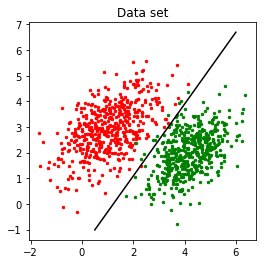

In [112]:
def boundary(x, D, const):
    return -(D[0]*x+const)/D[1]

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.scatter(data_a[:,0], data_a[:,1], s=6, c='r')
ax.scatter(data_b[:,0], data_b[:,1], s=6, c='g')
ax.set_title('Data set')

p0 = [0.5, boundary(0.5, D, const)]
p1 = [6., boundary(6., D, const)]
print(p0)
print(p1)
plt.plot([p0[0], p1[0]], [p0[1], p1[1]], 'k')

In [113]:
import matplotlib.mlab as mlab

In [114]:
step = 0.05
x1 = np.arange(ma[0]-3*np.sqrt(Sa[0,0]), ma[0]+3*np.sqrt(Sa[0,0]), step)
y1 = np.arange(ma[1]-3*np.sqrt(Sa[1,1]), ma[1]+3*np.sqrt(Sa[1,1]), step)
x1,y1=np.meshgrid(x1,y1)
z1=mlab.bivariate_normal(x1, y1, np.sqrt(Sa[0,0]), np.sqrt(Sa[1,1]), ma[0], ma[1],Sa[0,1])
print(z1.min())
print(z1.max())

# (x, y, sigmax = 1.0, sigmay = 1.0, mux = 0.0, muy = 0.0, sigmaxy = 0.0) = arguments and keywords to call mlab.bivariate_normal
x2 = np.arange(mb[0]-3*np.sqrt(Sb[0,0]), mb[0]+3*np.sqrt(Sb[0,0]), step)
y2 = np.arange(mb[1]-3*np.sqrt(Sb[1,1]), mb[1]+3*np.sqrt(Sb[1,1]), step)
x2,y2=np.meshgrid(x2,y2)
z2=mlab.bivariate_normal(x2, y2, np.sqrt(Sb[0,0]), np.sqrt(Sb[1,1]), mb[0], mb[1],Sb[0,1])
print(z2.min())
print(z2.max())

3.771840731888629e-09
0.1837762984739307
1.6703946003260903e-08
0.2769216333870581


C:\Users\tzica\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  """
C:\Users\tzica\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  del sys.path[0]


Text(0.5,1,'Contour lines for the two Gaussians')

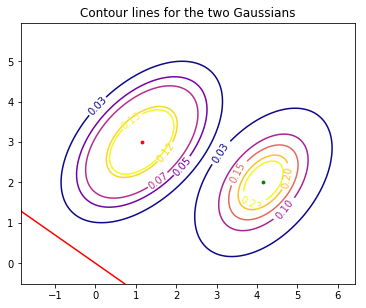

In [170]:
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, aspect='equal')

CS1 = ax.contour(x1, y1, z1, cmap=plt.cm.plasma, levels=[z1.min()+0.025, 0.05, 0.07, 0.125, z1.max()-0.05])
ax.clabel(CS1, inline=True, fontsize=10, fmt='%.2f')
CS2 = ax.contour(x2, y2, z2, cmap=plt.cm.plasma, levels=[z2.min()+0.025, 0.1, 0.15, 0.2, z2.max()-0.05])
ax.clabel(CS2, inline=True, fontsize=10, fmt='%.2f')

ax.scatter(ma[0], ma[1], s=8, c='r') # mean vector for the first gaussian
ax.scatter(mb[0], mb[1], s=8, c='g') # mean vector for the second gaussian

boundary1 = [0.5, -1.0137313848205587]
boundary2 = [6.0, 6.695351795380213]


a = ax.get_xbound()[0]
b = a*optimalw0[1]/optimalw0[0]
d = ax.get_ybound()[0]
c = d*optimalw0[0]/optimalw0[1]
ax.plot([a,c], [b,d], 'r') # line of the optimal direction w, y=(optimalw0[1]/optimalw[0])*x
# plt.plot([boundary1[0], boundary2[0]], [boundary1[1], boundary2[1]], 'k')
ax.set_title("Contour lines for the two Gaussians")